**129L Section 7B** <br>
2/20/25

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import roots_legendre

# Task 1: Sobol Sequence

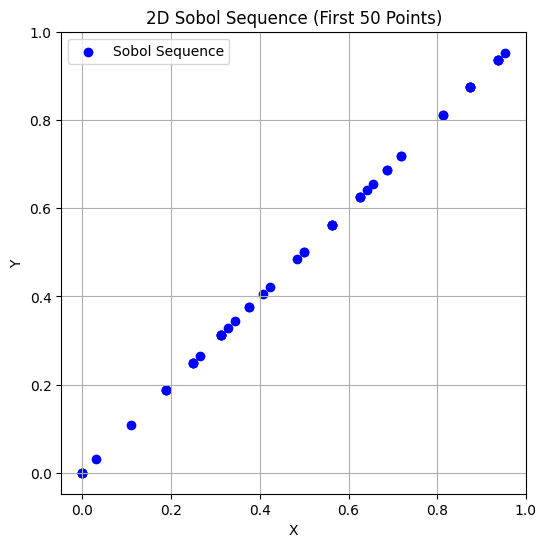

In [7]:
def sobol_2d_sequence(n):
    # Initialize direction numbers for 2D Sobol sequence
    D = 2  # Two dimensions
    L = n.bit_length()  # Max bit length needed
    
    # Initialize direction numbers
    V = np.zeros((D, L))
    V[0, 0] = 1 / 2
    V[0, 1] = 3 / 4
    V[0, 2] = 5 / 8
    
    for i in range(3, L):
        V[0, i] = V[0, i - 1] / 2
    
    # Generate Sobol sequence
    x = np.zeros((n, D))
    c = np.zeros(n, dtype=int)  # Ensure c is an integer array
    
    for i in range(1, n):
        c[i] = c[i - 1] ^ ((i & -i).bit_length() - 1)  # Bitwise XOR on integers
        x[i, 0] = x[i - 1, 0] + V[0, min(c[i], L - 1)]
        x[i, 1] = x[i - 1, 1] + V[0, min(c[i], L - 1)]
    
    return x % 1  # Ensure values stay within [0,1]

# Parameters
num_points = 50

# Generate sequence
sobol_points = sobol_2d_sequence(num_points)

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(sobol_points[:, 0], sobol_points[:, 1], color='blue', label='Sobol Sequence')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Sobol Sequence (First 50 Points)')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Monte Carlo Integration vs. Deterministic Quadrature

**Part a)**

The given ellipsoid is defined by:

$$
\frac{x^2 + y^2}{\beta^2} + \frac{z^2}{c^2} = 1
$$

where $( -1 \leq x \leq 1 ) and ( -1 \leq y \leq 1 )$. 

The surface area of this ellipsoid can be computed using the standard formula:

$$
A = 2\pi \beta \int_{-c}^{c} \sqrt{1 + \left( \frac{dz}{dx} \right)^2} \, dz
$$

Since the ellipsoid can be rewritten as:

$$
z = c \sqrt{1 - \frac{x^2 + y^2}{\beta^2}}
$$

we differentiate to obtain:

$$
\frac{dz}{dx} = -\frac{c}{\beta^2} \cdot \frac{x}{\sqrt{1 - \frac{x^2 + y^2}{\beta^2}}}
$$

By parameterizing in terms of a single variable and integrating accordingly, the surface area simplifies to:

$$
A = 2\pi \beta c \int_{-1}^{1} \sqrt{1 + \frac{z^2}{c^2}} \, dz.
$$

**Part b)**

In [23]:
# Define parameters (example values)
beta = 2  # Semi-axis along x and y
c = 1     # Semi-axis along z

# Define the function under the integral
def f(z, c):
    return np.sqrt(1 + (z**2 / c**2))

# Midpoint Rule Implementation
def midpoint_rule(f, a, b, n, c):
    h = (b - a) / n
    midpoints = np.linspace(a + h/2, b - h/2, n)  # Midpoints of subintervals
    return h * np.sum(f(midpoints, c))

# Gaussian Quadrature Implementation
def gaussian_quadrature(f, a, b, c, n=10):
    integral, _ = quad(f, a, b, args=(c,))
    return integral

# Define integration limits
a, b = -c, c  # Limits of integration

# Compute the approximations
n_points = 100  # Number of points for midpoint rule
midpoint_approx = 2 * np.pi * beta * c * midpoint_rule(f, a, b, n_points, c)
gaussian_approx = 2 * np.pi * beta * c * gaussian_quadrature(f, a, b, c)

# Print results
print(f"Midpoint Rule Approximation: {midpoint_approx:.6f}")
print(f"Gaussian Quadrature Approximation: {gaussian_approx:.6f}")

Midpoint Rule Approximation: 28.846903
Gaussian Quadrature Approximation: 28.847199


In [26]:
# Define parameters (example values)
beta = 3
c = 6

# Define the function under the integral
def f(z, c):
    return np.sqrt(1 + (z**2 / c**2))

# Midpoint Rule Implementation
def midpoint_rule(f, a, b, n, c):
    h = (b - a) / n
    midpoints = np.linspace(a + h/2, b - h/2, n)  # Midpoints of subintervals
    return h * np.sum(f(midpoints, c))

# Gaussian Quadrature Implementation
def gaussian_quadrature(f, a, b, c, n=10):
    integral, _ = quad(f, a, b, args=(c,))
    return integral

# Define integration limits
a, b = -c, c  # Limits of integration

# Compute the approximations
n_points = 100  # Number of points for midpoint rule
midpoint_approx = 2 * np.pi * beta * c * midpoint_rule(f, a, b, n_points, c)
gaussian_approx = 2 * np.pi * beta * c * gaussian_quadrature(f, a, b, c)

# beta = 4
# c = 5     # Semi-axis along z
a = beta  # Since x and y share the same axis

# Compute eccentricity e
e = np.sqrt(1 - (beta**2 / c**2))

# Compute the analytical surface area using the given formula
A_analytical = 2 * np.pi * beta**2 * (1 + (c / (a * e)) * np.arcsin(e))

# Print results
print(f"Analytical Formula Approximation: {A_analytical:.6f}")
print(f"Midpoint Rule Approximation: {midpoint_approx:.6f}")
print(f"Gaussian Quadrature Approximation: {gaussian_approx:.6f}")

# Compare percentage errors
error_midpoint = abs(A_analytical - midpoint_approx) / A_analytical * 100
error_gaussian = abs(A_analytical - gaussian_approx) / A_analytical * 100

print(f"Error in Midpoint Rule: {error_midpoint:.6f}%")
print(f"Error in Gaussian Quadrature: {error_gaussian:.6f}%")

Analytical Formula Approximation: 193.305918
Midpoint Rule Approximation: 1557.732746
Gaussian Quadrature Approximation: 1557.748740
Error in Midpoint Rule: 705.838105%
Error in Gaussian Quadrature: 705.846379%


a is the semi-major axis of the ellipsoid. 

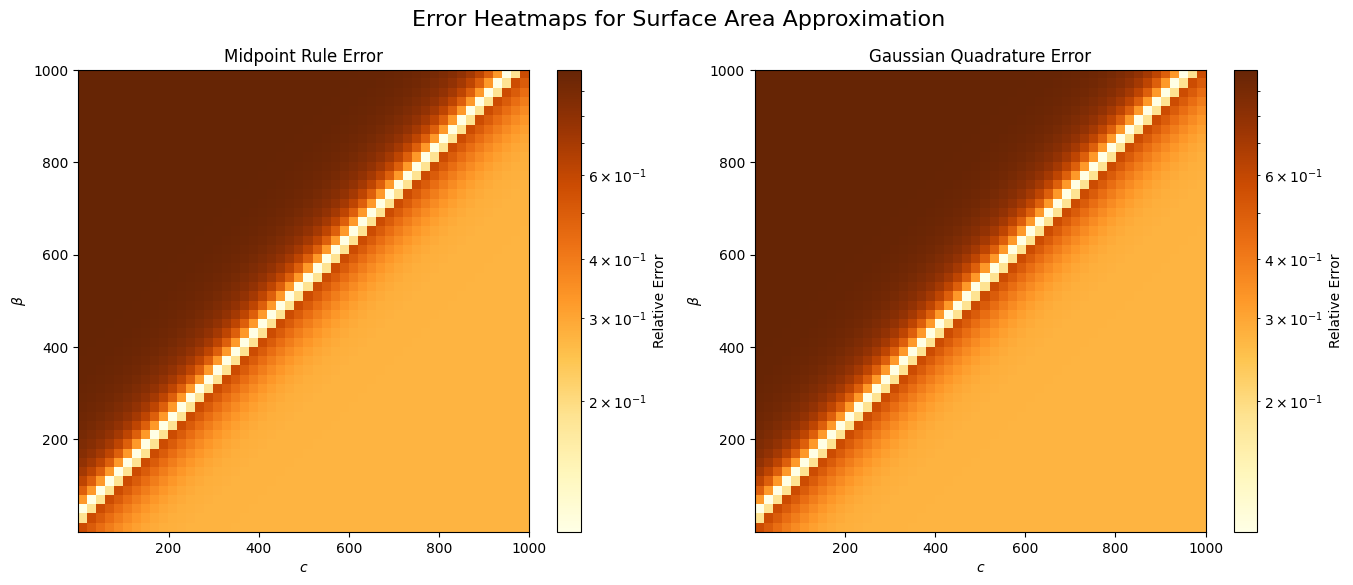

In [17]:
# Exact surface area formula
def exact_surface_area(beta, c):
    e = np.sqrt(1 - (beta ** 2) / (c ** 2)) if c > beta else 0  # Handle cases where c <= beta
    if e == 0:
        return 4 * np.pi * beta ** 2  # Sphere case
    return 2 * np.pi * beta ** 2 * (1 + (c / (beta * e)) * np.arcsin(e))

# Midpoint rule approximation
def midpoint_rule_area(beta, c, n=100):
    def integrand(theta):
        e = np.sqrt(1 - (beta ** 2) / (c ** 2)) if c > beta else 0
        return np.sqrt(1 - e ** 2 * np.sin(theta) ** 2)

    thetas = np.linspace(0, np.pi / 2, n)
    midpoints = (thetas[:-1] + thetas[1:]) / 2
    dtheta = thetas[1] - thetas[0]
    integral = np.sum(integrand(midpoints)) * dtheta
    return 4 * np.pi * beta * c * integral

# Gaussian quadrature approximation
def gaussian_quadrature_area(beta, c, n=50):
    def integrand(theta):
        e = np.sqrt(1 - (beta ** 2) / (c ** 2)) if c > beta else 0
        return np.sqrt(1 - e ** 2 * np.sin(theta) ** 2)

    nodes, weights = roots_legendre(n)
    # Map nodes from [-1, 1] to [0, pi/2]
    mapped_nodes = 0.25 * np.pi * (nodes + 1)
    integral = np.sum(weights * integrand(mapped_nodes)) * (np.pi / 4)
    return 4 * np.pi * beta * c * integral

# Error calculation
def compute_error(approx, exact):
    return np.abs((approx - exact) / exact)

# Heatmap generation
def plot_error_heatmap(beta_range, c_range, n_points=50):
    betas = np.logspace(np.log10(beta_range[0]), np.log10(beta_range[1]), n_points)
    cs = np.logspace(np.log10(c_range[0]), np.log10(c_range[1]), n_points)
    error_midpoint = np.zeros((n_points, n_points))
    error_gaussian = np.zeros((n_points, n_points))

    for i, beta in enumerate(betas):
        for j, c in enumerate(cs):
            exact = exact_surface_area(beta, c)
            approx_midpoint = midpoint_rule_area(beta, c, n=100)
            approx_gaussian = gaussian_quadrature_area(beta, c, n=50)
            error_midpoint[i, j] = compute_error(approx_midpoint, exact)
            error_gaussian[i, j] = compute_error(approx_gaussian, exact)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Midpoint error heatmap
    im1 = axes[0].imshow(error_midpoint, extent=[c_range[0], c_range[1], beta_range[0], beta_range[1]], 
                         aspect='auto', origin='lower', cmap='YlOrBr', norm='log')
    axes[0].set_title('Midpoint Rule Error')
    axes[0].set_xlabel('$c$')
    axes[0].set_ylabel('$\\beta$')
    fig.colorbar(im1, ax=axes[0], label='Relative Error')

    # Gaussian quadrature error heatmap
    im2 = axes[1].imshow(error_gaussian, extent=[c_range[0], c_range[1], beta_range[0], beta_range[1]], 
                         aspect='auto', origin='lower', cmap='YlOrBr', norm='log')
    axes[1].set_title('Gaussian Quadrature Error')
    axes[1].set_xlabel('$c$')
    axes[1].set_ylabel('$\\beta$')
    fig.colorbar(im2, ax=axes[1], label='Relative Error')

    plt.suptitle('Error Heatmaps for Surface Area Approximation', fontsize=16)
    plt.show()

# Parameters and execution
beta_range = (0.001, 1000)
c_range = (0.001, 1000)
plot_error_heatmap(beta_range, c_range, n_points=50)

**Part c)**

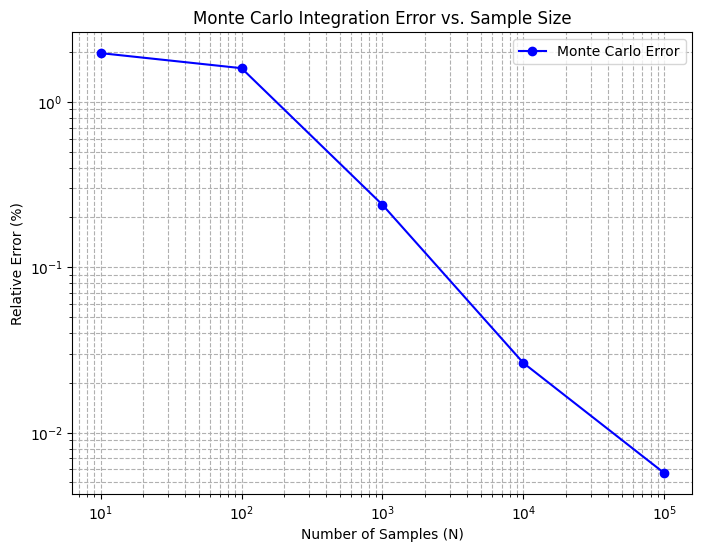

In [13]:
# Define parameters
beta = 0.5  # Since 2β = 1
c = 1
a, b = -c, c  # Integration limits

# Define the function to integrate
def f(x):
    return np.sqrt(1 + (x**2 / c**2))

# Compute the exact integral analytically
from scipy.integrate import quad
exact_integral, _ = quad(f, a, b)

# Define sampling sizes
N_values = [10, 100, 1000, 10000, 100000]
errors = []

# Monte Carlo Integration
for N in N_values:
    x_samples = np.random.uniform(a, b, N)  # Sample points from U(a, b)
    integral_estimate = (b - a) * np.mean(f(x_samples))  # Monte Carlo formula
    error = abs(integral_estimate - exact_integral) / exact_integral * 100  # Percentage error
    errors.append(error)

# Plot error vs. N
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors, marker='o', linestyle='-', color='b', label="Monte Carlo Error")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Relative Error (%)")
plt.title("Monte Carlo Integration Error vs. Sample Size")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

Sampling size calculated for  N=[10,100,1000,10000,100000]. 

**Part d)**

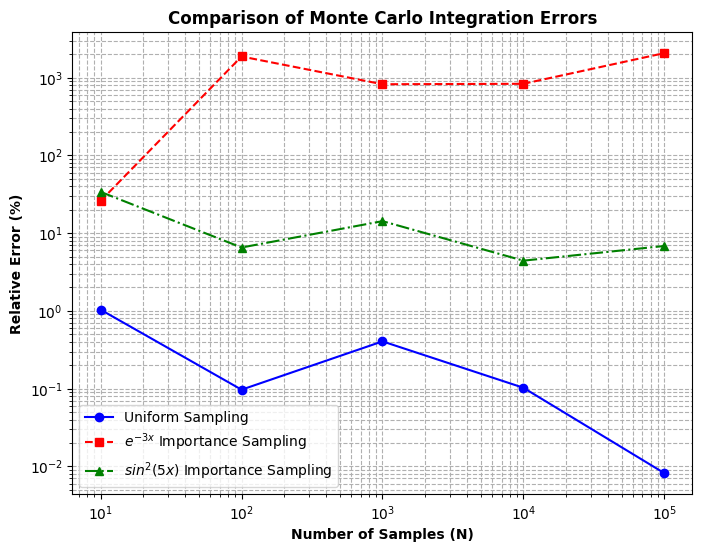

In [18]:
# Define parameters
beta = 0.5
c = 1
a, b = -c, c  # Integration limits

# Define function to integrate
def f(x):
    return np.sqrt(1 + (x**2 / c**2))

# Compute exact integral
exact_integral, _ = quad(f, a, b)

# Sampling sizes
N_values = [10, 100, 1000, 10000, 100000]
errors_uniform = []
errors_q1 = []
errors_q2 = []

# Generate samples using uniform distribution
for N in N_values:
    # Uniform Sampling
    x_uniform = np.random.uniform(a, b, N)
    integral_uniform = (b - a) * np.mean(f(x_uniform))
    error_uniform = abs(integral_uniform - exact_integral) / exact_integral * 100
    errors_uniform.append(error_uniform)
    
    # Importance Sampling with q1(x) = exp(-3x) (Inverse Transform Sampling)
    u = np.random.uniform(0, 1, N)  # Uniform samples
    x_q1 = -np.log(1 - u) / 3  # Inverse CDF of exp(-3x)
    w_q1 = np.exp(3 * x_q1)  # Weight function w(x) = 1/q(x)
    integral_q1 = np.mean(f(x_q1) * w_q1)
    error_q1 = abs(integral_q1 - exact_integral) / exact_integral * 100
    errors_q1.append(error_q1)

    # Importance Sampling with q2(x) = sin^2(5x) (Rejection Sampling)
    x_q2 = []
    while len(x_q2) < N:
        x_candidate = np.random.uniform(a, b)  # Sample uniformly
        accept_prob = np.sin(5 * x_candidate) ** 2  # Acceptance probability
        if np.random.uniform(0, 1) < accept_prob:
            x_q2.append(x_candidate)
    x_q2 = np.array(x_q2)
    w_q2 = 1 / (np.sin(5 * x_q2) ** 2)  # Importance weight
    integral_q2 = np.mean(f(x_q2) * w_q2)
    error_q2 = abs(integral_q2 - exact_integral) / exact_integral * 100
    errors_q2.append(error_q2)

# Plot error comparison
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors_uniform, marker='o', linestyle='-', label="Uniform Sampling", color='b')
plt.loglog(N_values, errors_q1, marker='s', linestyle='--', label="$e^{-3x}$ Importance Sampling", color='r')
plt.loglog(N_values, errors_q2, marker='^', linestyle='-.', label="$sin^2(5x)$ Importance Sampling", color='g')
plt.xlabel("Number of Samples (N)", fontweight='bold')
plt.ylabel("Relative Error (%)", fontweight='bold')
plt.title("Comparison of Monte Carlo Integration Errors", fontweight='bold')
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

**Part e)**

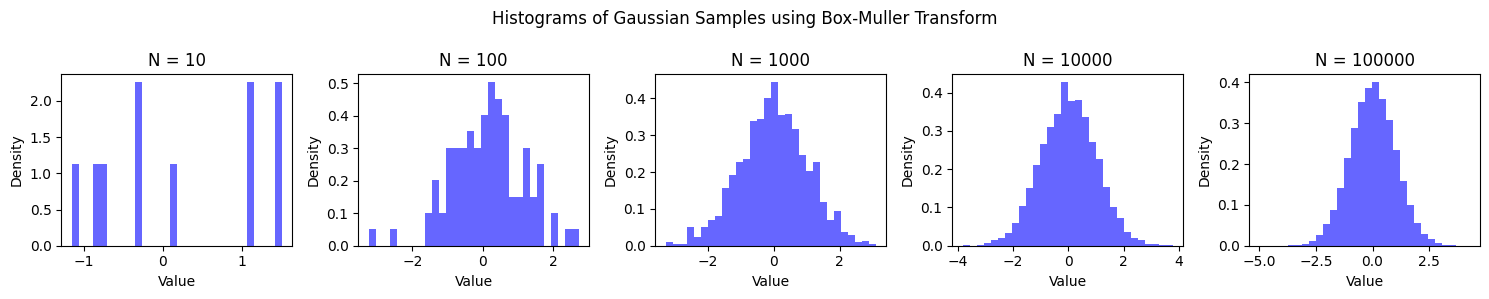

In [19]:
def box_muller_gaussian(N, mu=0, sigma=1):
    """Generate N Gaussian distributed samples using the Box-Muller transform."""
    U1 = np.random.uniform(0, 1, N//2)
    U2 = np.random.uniform(0, 1, N//2)

    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

    samples = np.concatenate((Z1, Z2))  # Combine both Z1 and Z2
    return mu + sigma * samples  # Scale to desired mean and std deviation

# Define sample sizes
N_values = [10, 100, 1000, 10000, 100000]
mu, sigma = 0, 1  # Standard normal distribution

# Plot histograms for each sample size
fig, axes = plt.subplots(1, len(N_values), figsize=(15, 3), tight_layout=True)

for i, N in enumerate(N_values):
    samples = box_muller_gaussian(N, mu, sigma)
    axes[i].hist(samples, bins=30, density=True, alpha=0.6, color='b')
    axes[i].set_title(f"N = {N}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Density")

plt.suptitle("Histograms of Gaussian Samples using Box-Muller Transform")
plt.show()

As N increases, the samples look more like a Gaussian distribution. 

**Part f)**

# Task 3: Rejection Sampling

**Part a)**

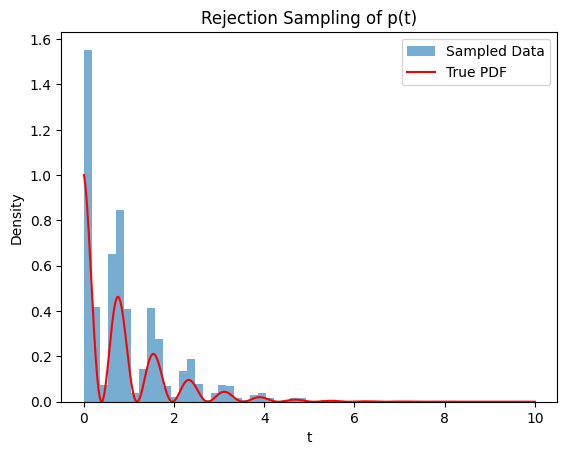

In [20]:
# Define the parameters
a = 4
b = a / 4  # Since a = 4b

# Define the PDF p(t)
def pdf(t):
    return np.exp(-b * t) * (np.cos(a * t) ** 2)

# Define the proposal distribution q(t) ~ U(0, tf)
def proposal(tf):
    return np.random.uniform(0, tf)

# Rejection sampling function
def rejection_sampling(tf, M, num_samples):
    samples = []
    while len(samples) < num_samples:
        t = proposal(tf)  # Sample from the proposal distribution
        u = np.random.uniform(0, 1)  # Uniform random number
        if u < pdf(t) / (M * (1 / tf)):  # Acceptance condition
            samples.append(t)
    return np.array(samples)

# Determine M (maximum value of p(t) / q(t))
# Since q(t) is uniform, q(t) = 1 / tf
# We need to find the maximum of p(t) in the interval [0, tf]
tf = 10  # Choose a suitable upper limit
t_values = np.linspace(0, tf, 1000)
p_values = pdf(t_values)
M = np.max(p_values) * tf  # Since q(t) = 1 / tf

# Generate samples using rejection sampling
num_samples = 10000
samples = rejection_sampling(tf, M, num_samples)

# Plot the histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Data')

# Plot the true PDF for comparison
t_values = np.linspace(0, tf, 1000)
plt.plot(t_values, pdf(t_values), 'r-', label='True PDF')

plt.xlabel('t')
plt.ylabel('Density')
plt.title('Rejection Sampling of p(t)')
plt.legend()
plt.show()

$t_f$ should be chosen so that the exponential term is very small, so that the significant part of the PDF converges. 

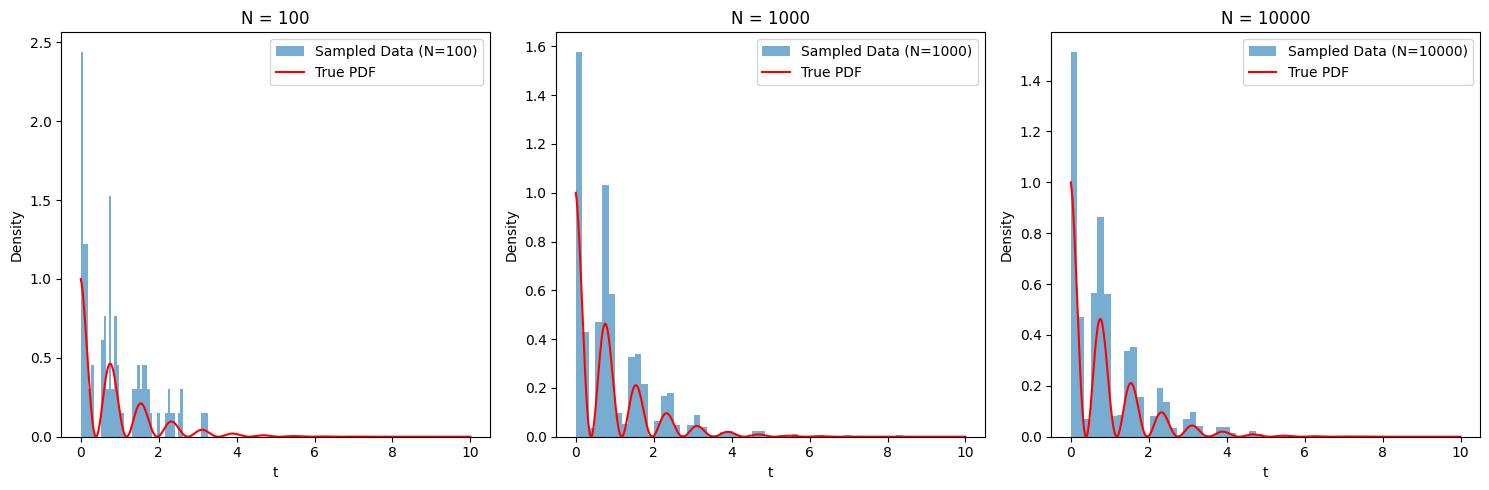

Rejection ratio for N = 100: 0.0622
Rejection ratio for N = 1000: 0.0538
Rejection ratio for N = 10000: 0.0541


In [22]:
# Define the parameters
a = 4
b = a / 4  # Since a = 4b

# Define the PDF p(t)
def pdf(t):
    return np.exp(-b * t) * (np.cos(a * t) ** 2)

# Define the proposal distribution q(t) ~ U(0, tf)
def proposal(tf):
    return np.random.uniform(0, tf)

# Rejection sampling function
def rejection_sampling(tf, M, num_samples):
    samples = []
    num_accepts = 0
    num_rejects = 0
    while len(samples) < num_samples:
        t = proposal(tf)  # Sample from the proposal distribution
        u = np.random.uniform(0, 1)  # Uniform random number
        if u < pdf(t) / (M * (1 / tf)):  # Acceptance condition
            samples.append(t)
            num_accepts += 1
        else:
            num_rejects += 1
    rejection_ratio = num_accepts / num_rejects if num_rejects > 0 else np.inf
    return np.array(samples), rejection_ratio

# Determine M (maximum value of p(t) / q(t))
# Since q(t) is uniform, q(t) = 1 / tf
# We need to find the maximum of p(t) in the interval [0, tf]
tf = 10 / b  # Choose tf such that e^(-b*tf) is very small
t_values = np.linspace(0, tf, 1000)
p_values = pdf(t_values)
M = np.max(p_values) * tf  # Since q(t) = 1 / tf

# Generate samples and plot histograms for N = [100, 1000, 10000]
sample_sizes = [100, 1000, 10000]
rejection_ratios = []

plt.figure(figsize=(15, 5))
for i, N in enumerate(sample_sizes):
    samples, rejection_ratio = rejection_sampling(tf, M, N)
    rejection_ratios.append(rejection_ratio)
    
    plt.subplot(1, 3, i + 1)
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f'Sampled Data (N={N})')
    plt.plot(t_values, pdf(t_values), 'r-', label='True PDF')
    plt.xlabel('t')
    plt.ylabel('Density')
    plt.title(f'N = {N}')
    plt.legend()

plt.tight_layout()
plt.show()

# Print rejection ratios
for N, ratio in zip(sample_sizes, rejection_ratios):
    print(f"Rejection ratio for N = {N}: {ratio:.4f}")

**Part b)**

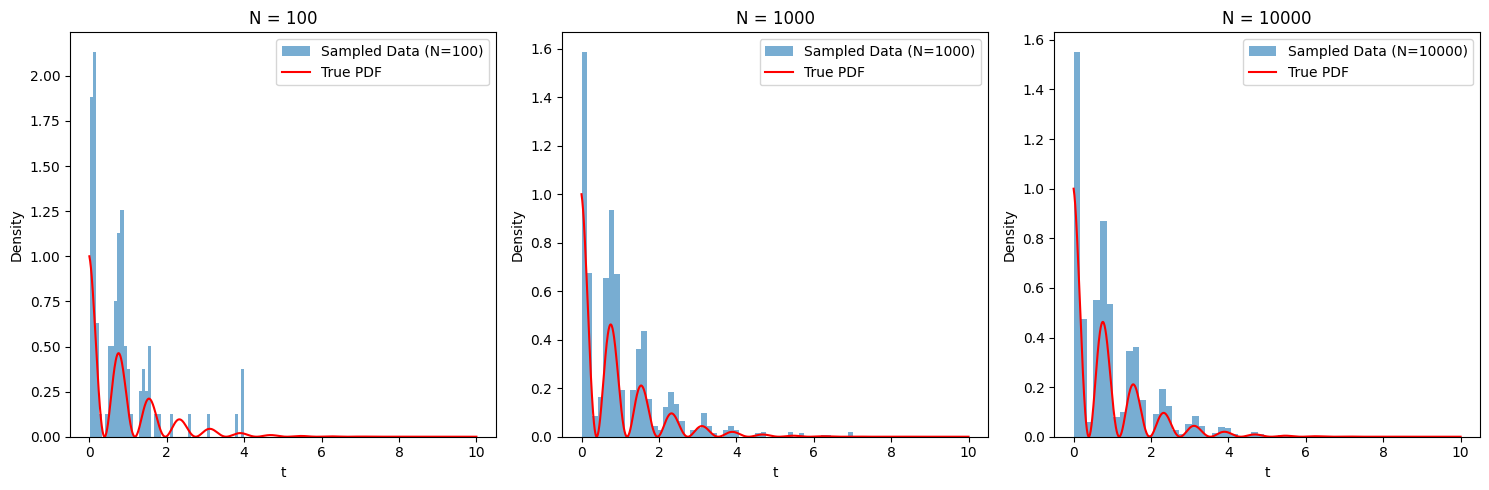

Rejection ratio for N = 100: 1.1236
Rejection ratio for N = 1000: 1.0309
Rejection ratio for N = 10000: 1.0135
Value of M: 1.0000


In [23]:
# Define the parameters
a = 4
b = a / 4  # Since a = 4b

# Define the target PDF p(t)
def pdf(t):
    return np.exp(-b * t) * (np.cos(a * t) ** 2)

# Define the proposal PDF q(t) ~ Exp(1) = e^(-t)
def proposal():
    return np.random.exponential(scale=1.0)  # Exponential with rate lambda = 1

# Rejection sampling function
def rejection_sampling(num_samples):
    samples = []
    num_accepts = 0
    num_rejects = 0
    
    # Find M: maximum of p(t) / q(t)
    t_values = np.linspace(0, 20, 10000)  # Evaluate over a large range
    ratio = np.exp((1 - b) * t_values) * (np.cos(a * t_values) ** 2)
    M = np.max(ratio)  # Maximum value of p(t) / q(t)
    
    # Perform rejection sampling
    while len(samples) < num_samples:
        t = proposal()  # Sample from the proposal distribution
        u = np.random.uniform(0, 1)  # Uniform random number
        if u < pdf(t) / (M * np.exp(-t)):  # Acceptance condition
            samples.append(t)
            num_accepts += 1
        else:
            num_rejects += 1
    
    rejection_ratio = num_accepts / num_rejects if num_rejects > 0 else np.inf
    return np.array(samples), rejection_ratio, M

# Generate samples and plot histograms for N = [100, 1000, 10000]
sample_sizes = [100, 1000, 10000]
rejection_ratios = []

plt.figure(figsize=(15, 5))
for i, N in enumerate(sample_sizes):
    samples, rejection_ratio, M = rejection_sampling(N)
    rejection_ratios.append(rejection_ratio)
    
    plt.subplot(1, 3, i + 1)
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f'Sampled Data (N={N})')
    
    # Plot the true PDF for comparison
    t_values = np.linspace(0, 10, 1000)
    plt.plot(t_values, pdf(t_values), 'r-', label='True PDF')
    
    plt.xlabel('t')
    plt.ylabel('Density')
    plt.title(f'N = {N}')
    plt.legend()

plt.tight_layout()
plt.show()

# Print rejection ratios
for N, ratio in zip(sample_sizes, rejection_ratios):
    print(f"Rejection ratio for N = {N}: {ratio:.4f}")

# Print the value of M
print(f"Value of M: {M:.4f}")

Rejection Ratios:
Uniform Proposal:
N = 100: 0.0467
N = 1000: 0.0536
N = 10000: 0.0546

Exponential Proposal:
N = 100: 1.1905
N = 1000: 0.9950
N = 10000: 1.0053


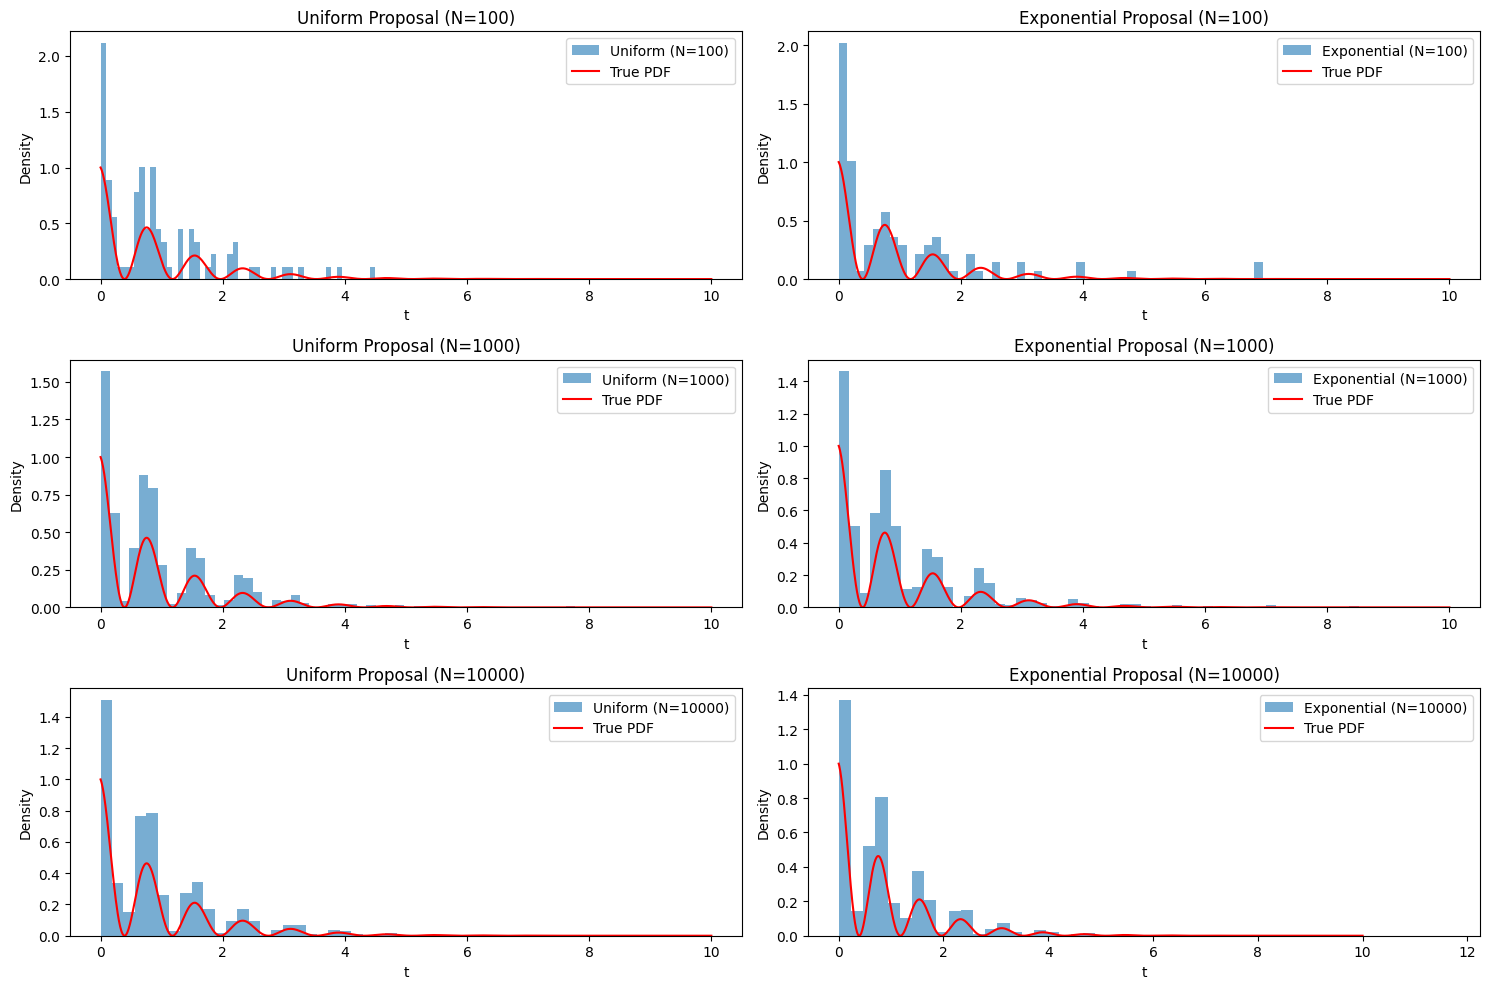

In [25]:
# Define the parameters
a = 4
b = a / 4  # Since a = 4b

# Define the target PDF p(t)
def pdf(t):
    return np.exp(-b * t) * (np.cos(a * t) ** 2)

# Uniform proposal function q(t) ~ U(0, tf)
def uniform_proposal(tf):
    return np.random.uniform(0, tf)

# Exponential proposal function q(t) ~ Exp(1) = e^(-t)
def exponential_proposal():
    return np.random.exponential(scale=1.0)

# Rejection sampling with uniform proposal
def rejection_sampling_uniform(tf, M, num_samples):
    samples = []
    num_accepts = 0
    num_rejects = 0
    while len(samples) < num_samples:
        t = uniform_proposal(tf)  # Sample from the uniform proposal
        u = np.random.uniform(0, 1)  # Uniform random number
        if u < pdf(t) / (M * (1 / tf)):  # Acceptance condition
            samples.append(t)
            num_accepts += 1
        else:
            num_rejects += 1
    rejection_ratio = num_accepts / num_rejects if num_rejects > 0 else np.inf
    return np.array(samples), rejection_ratio

# Rejection sampling with exponential proposal
def rejection_sampling_exponential(num_samples):
    samples = []
    num_accepts = 0
    num_rejects = 0
    
    # Find M: maximum of p(t) / q(t)
    t_values = np.linspace(0, 20, 10000)  # Evaluate over a large range
    ratio = np.exp((1 - b) * t_values) * (np.cos(a * t_values) ** 2)
    M = np.max(ratio)  # Maximum value of p(t) / q(t)
    
    # Perform rejection sampling
    while len(samples) < num_samples:
        t = exponential_proposal()  # Sample from the exponential proposal
        u = np.random.uniform(0, 1)  # Uniform random number
        if u < pdf(t) / (M * np.exp(-t)):  # Acceptance condition
            samples.append(t)
            num_accepts += 1
        else:
            num_rejects += 1
    
    rejection_ratio = num_accepts / num_rejects if num_rejects > 0 else np.inf
    return np.array(samples), rejection_ratio, M

# Sample sizes to test
sample_sizes = [100, 1000, 10000]

# Results for uniform proposal
tf = 10 / b  # Upper limit for uniform proposal
t_values = np.linspace(0, tf, 1000)
p_values = pdf(t_values)
M_uniform = np.max(p_values) * tf  # M for uniform proposal

uniform_results = []
for N in sample_sizes:
    samples, rejection_ratio = rejection_sampling_uniform(tf, M_uniform, N)
    uniform_results.append((samples, rejection_ratio))

# Results for exponential proposal
exponential_results = []
for N in sample_sizes:
    samples, rejection_ratio, M_exp = rejection_sampling_exponential(N)
    exponential_results.append((samples, rejection_ratio))

# Print rejection ratios
print("Rejection Ratios:")
print("Uniform Proposal:")
for N, (_, ratio) in zip(sample_sizes, uniform_results):
    print(f"N = {N}: {ratio:.4f}")

print("\nExponential Proposal:")
for N, (_, ratio) in zip(sample_sizes, exponential_results):
    print(f"N = {N}: {ratio:.4f}")

# Plot histograms for comparison
plt.figure(figsize=(15, 10))
for i, N in enumerate(sample_sizes):
    # Uniform proposal
    plt.subplot(3, 2, 2 * i + 1)
    samples_uniform, _ = uniform_results[i]
    plt.hist(samples_uniform, bins=50, density=True, alpha=0.6, label=f'Uniform (N={N})')
    plt.plot(t_values, pdf(t_values), 'r-', label='True PDF')
    plt.xlabel('t')
    plt.ylabel('Density')
    plt.title(f'Uniform Proposal (N={N})')
    plt.legend()

    # Exponential proposal
    plt.subplot(3, 2, 2 * i + 2)
    samples_exp, _ = exponential_results[i]
    plt.hist(samples_exp, bins=50, density=True, alpha=0.6, label=f'Exponential (N={N})')
    plt.plot(t_values, pdf(t_values), 'r-', label='True PDF')
    plt.xlabel('t')
    plt.ylabel('Density')
    plt.title(f'Exponential Proposal (N={N})')
    plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Rejection sampling with exponential proposal (updated to print details)
def rejection_sampling_exponential(num_samples):
    samples = []
    num_accepts = 0
    num_rejects = 0
    
    # Find M: maximum of p(t) / q(t)
    t_values = np.linspace(0, 20, 10000)  # Evaluate over a large range
    ratio = np.exp((1 - b) * t_values) * (np.cos(a * t_values) ** 2)
    M = np.max(ratio)  # Maximum value of p(t) / q(t)
    
    # Perform rejection sampling
    while len(samples) < num_samples:
        t = exponential_proposal()  # Sample from the exponential proposal
        u = np.random.uniform(0, 1)  # Uniform random number
        if u < pdf(t) / (M * np.exp(-t)):  # Acceptance condition
            samples.append(t)
            num_accepts += 1
        else:
            num_rejects += 1
    
    rejection_ratio = num_accepts / num_rejects if num_rejects > 0 else np.inf
    return np.array(samples), rejection_ratio, num_accepts, num_rejects

# Test for N = 100, 1000, 10000
sample_sizes = [100, 1000, 10000]
for N in sample_sizes:
    samples, rejection_ratio, num_accepts, num_rejects = rejection_sampling_exponential(N)
    print(f"N = {N}:")
    print(f"  Accepted: {num_accepts}, Rejected: {num_rejects}")
    print(f"  Rejection Ratio: {rejection_ratio:.4f}")

N = 100:
  Accepted: 100, Rejected: 104
  Rejection Ratio: 0.9615
N = 1000:
  Accepted: 1000, Rejected: 952
  Rejection Ratio: 1.0504
N = 10000:
  Accepted: 10000, Rejected: 9596
  Rejection Ratio: 1.0421


It looks like the rejection ratio changes slightly each time the code is run because the sampling is a stochastic process.